In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

class1_plot = np.ones((100,4))
class2_plot = np.ones((100,4))
total_data = np.ones((200,4))
class1 = list(class1_plot)
class2 = list(class2_plot)
total_data = list(total_data)

In [3]:
read_data = open("class1.txt", "r")
file_data = read_data.readlines()

for i in range(len(file_data)):
    file_data[i] = file_data[i].replace('\n', '')
    file_data[i] = file_data[i].split(',')
    if (i != 0):
        class1[i-1][1] = file_data[i][0]
        class1[i-1][2] = file_data[i][1]
        total_data[i-1] = class1[i-1]
        
read_data.close()
read_data = open("class2.txt", "r")
file_data = read_data.readlines()

for i in range(len(file_data)):
    file_data[i] = file_data[i].replace('\n', '')
    file_data[i] = file_data[i].split(',')
    if (i != 0):
        class2[i-1][1] = file_data[i][0]
        class2[i-1][2] = file_data[i][1]
        class2[i-1][3] = 0
        total_data[i+99] = class2[i-1]
        
#print(type(total_data))

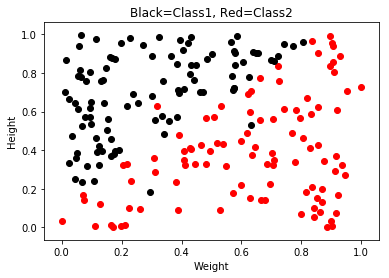

In [4]:
plt.scatter(class2_plot[:,1], class2_plot[:,2], color = 'red')
plt.scatter(class1_plot[:,1], class1_plot[:,2], color='black')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Black=Class1, Red=Class2')
plt.show()

In [5]:
from random import shuffle

# Perceptron Learning
def initial_weights():
    weights = np.ones(3)
    for i in range(3):
        weights[i] = np.random.uniform(0,1)
    return weights

def perceptron(data, eta, iterations):
    # initalize weight values wi(k) randomly [0,1]
    weights = initial_weights()
    niter = 0
    misclassified = []
    #print(len(data))
    shuffle(data)
    while (niter < iterations):
        count = 0
        #print("WEIGHTS AT STEP: " + str(niter))
        #print(weights)
        delta_w = np.zeros(3)
        for i in range(len(data)):
            # compute output
            v = sum(weights * data[i][:3])
            output = 1 if v >= 0 else 0
            # check if misclassified
            if (output != data[i][3]):
                count += 1
                for j in range(3):
                    delta_w[j] += eta*(data[i][3] - output)*data[i][j]
        for x in range(len(weights)):
            weights[x] += delta_w[x]
        misclassified.append(count)
        niter += 1
    return [weights, misclassified]

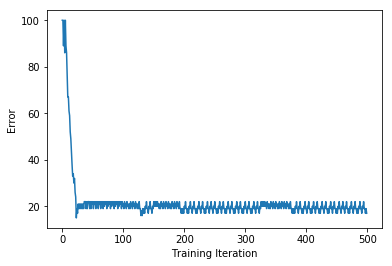

[19, 19, 17, 19, 17]


In [7]:
#Use learning rate 0.05 and iteration 500
out = perceptron(total_data, 0.05, 500)
final_weights = out[0]
misclassified = out[1]
plt.plot(misclassified)
plt.xlabel('Training Iteration')
plt.ylabel('Error')
plt.show()
print(misclassified[-5:])

[-0.4772335  -7.99239726  8.28843705]
0.9642827964410337
0.057578225740579816


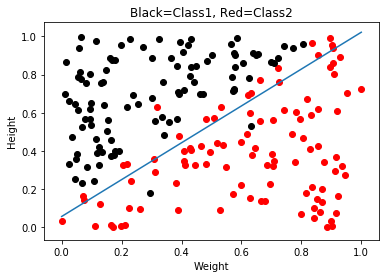

In [241]:
print(final_weights)
slope = final_weights[1] / final_weights[2] * -1
intercept = final_weights[0] / final_weights[2] * -1
print(slope)
print(intercept)
def boundary(x, slope, intercept):
    return slope*x+intercept

plt.scatter(class2_plot[:,1], class2_plot[:,2], color = 'red')
plt.scatter(class1_plot[:,1], class1_plot[:,2], color='black')
x = np.linspace(0,1, 10)
plt.plot(x, boundary(x, slope, intercept))

plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Black=Class1, Red=Class2')
plt.show()

In [242]:
weight_test = np.random.randn(3)
weight_test /= np.amax(weights)
print(weight_test)
print(class1[3])
print(class1[3][:3])
v = sum(weights * class1[3][:3])
print(v)
output =  1 if v > 0 else 0
output

[-0.25336031 -0.89170867 -0.44681662]
[1.    0.633 0.53  1.   ]
[1.    0.633 0.53 ]
-0.11318112389931767


0